In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
# attack_type = 'none'
datasets = 'dblp'.split()
# stats = 'homophily community'.split()
df_results = pd.DataFrame()
for dataset in datasets:
    for attack_type in 'none random dice sacide structack_dg_comm structack_pr_katz'.split():
        c_attack_type = attack_type
        df_current = pd.read_csv(f'../results/stats-centrality-{dataset}-{c_attack_type}.csv')
        df_current['dataset'] = dataset
        df_current['attack_type'] = attack_type
        df_results = pd.concat([df_results, df_current], ignore_index=True)

In [45]:
for attack in df_results.attack_type.unique():
    row = df_results[df_results.attack_type == 'none']
    row['attack_type'] = attack
    df_results=df_results.append(row, ignore_index=True)

C:\Users\Meng\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 432x288 with 0 Axes>

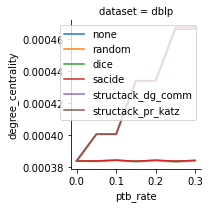

<Figure size 432x288 with 0 Axes>

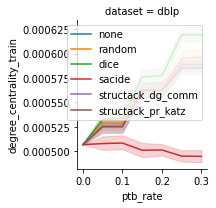

<Figure size 432x288 with 0 Axes>

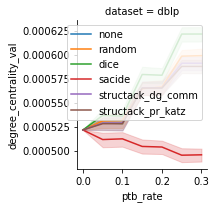

<Figure size 432x288 with 0 Axes>

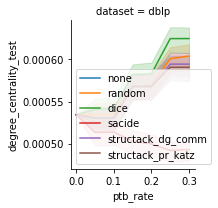

<Figure size 432x288 with 0 Axes>

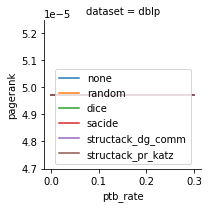

<Figure size 432x288 with 0 Axes>

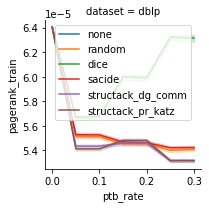

<Figure size 432x288 with 0 Axes>

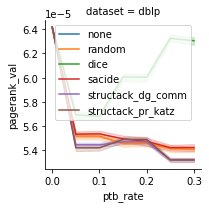

<Figure size 432x288 with 0 Axes>

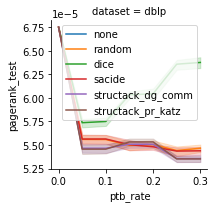

In [46]:
if dataset =='nba':
    measures='degree_centrality degree_centrality_train degree_centrality_val degree_centrality_test pagerank pagerank_train pagerank_val pagerank_test closeness_centrality closeness_centrality_train closeness_centrality_val closeness_centrality_test betweeness_centrality betweeness_centrality_train betweeness_centrality_val betweeness_centrality_test'
else:
    measures='degree_centrality degree_centrality_train degree_centrality_val degree_centrality_test pagerank pagerank_train pagerank_val pagerank_test'    
for measure in measures.split():
    plt.figure()
    g = sns.FacetGrid(df_results, col='dataset')
    g.map(sns.lineplot,'ptb_rate', measure, 'attack_type')
    plt.legend()
    plt.savefig('../reports/figures/'+dataset+'-' + measure + '.png')
#     sns.lineplot(data=df_results, x='ptb_rate', hue='attack_type', y=measure)
